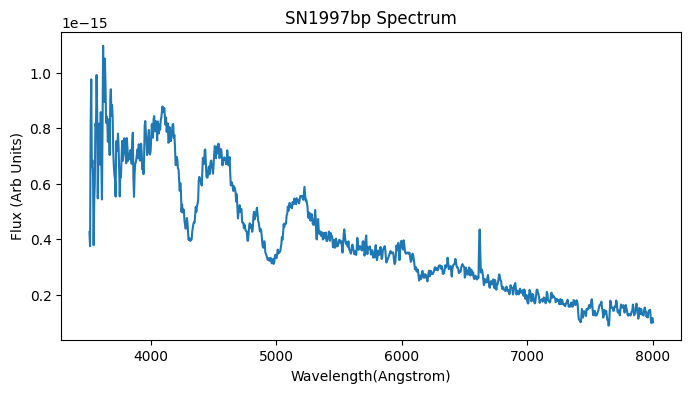

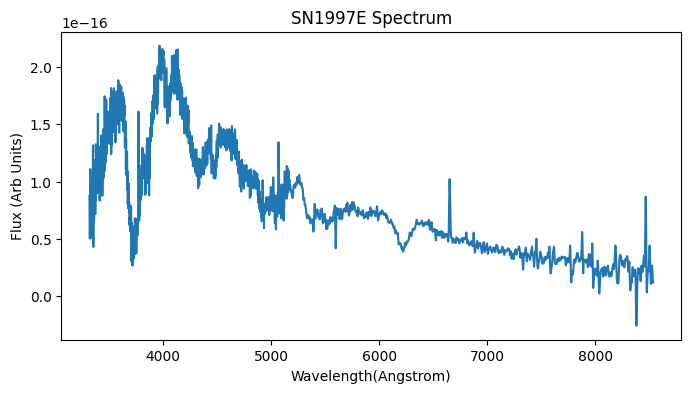

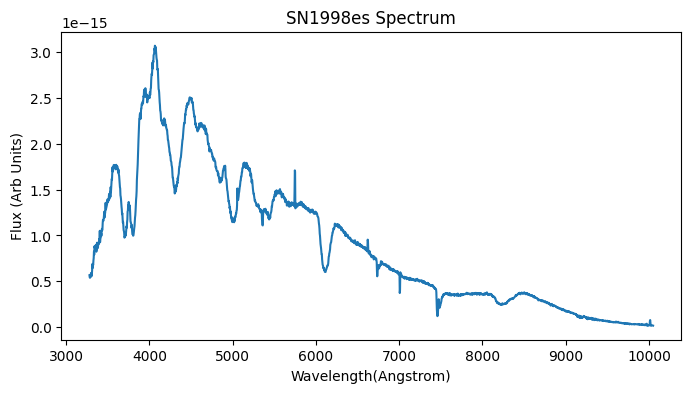

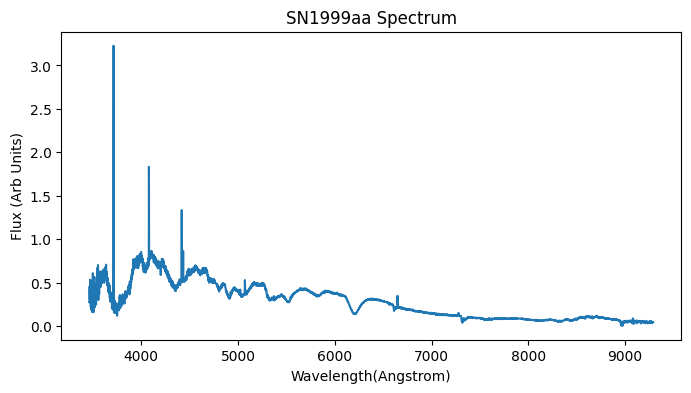

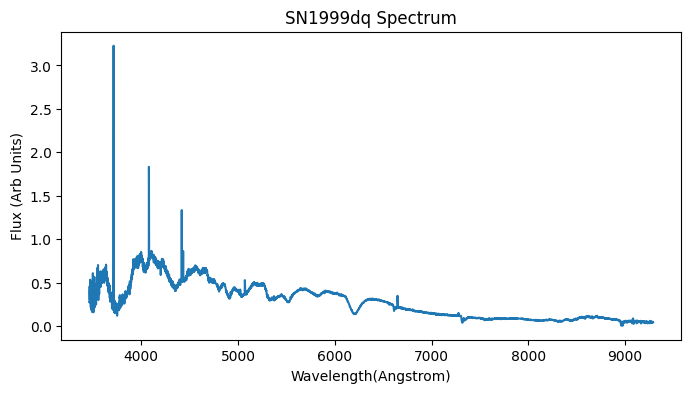

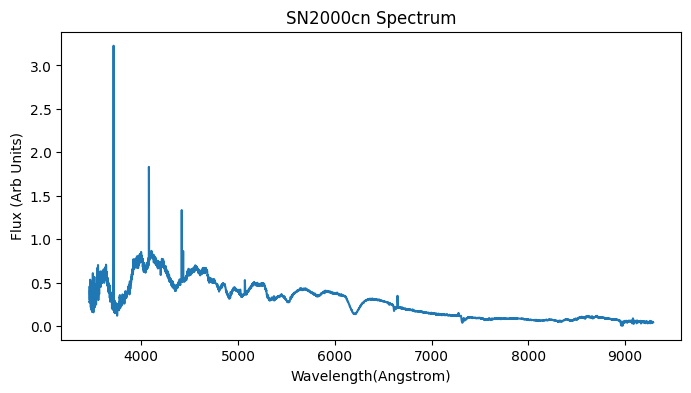

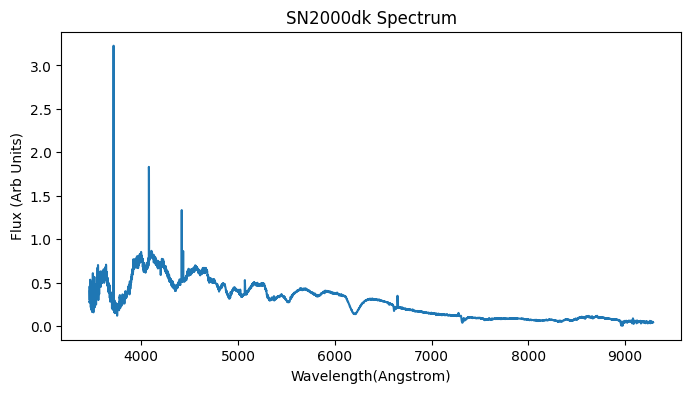

In [3]:
#WEEK 1 PART A
from astropy.io import fits
from astropy import wcs
import numpy as np
import matplotlib.pyplot as plt
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

bpw, bpf = np.loadtxt("sn1997bp_spec.ascii", unpack=True)
plt.figure(figsize=(8, 4))
plt.plot(bpw,bpf)
plt.title('SN1997bp Spectrum')
plt.xlabel('Wavelength(Angstrom)')
plt.ylabel('Flux (Arb Units)')
plt.show()

Ew, Ef= np.loadtxt("sn1997E_spec.ascii", unpack=True)
plt.figure(figsize=(8, 4))
plt.plot(Ew,Ef)
plt.title('SN1997E Spectrum')
plt.xlabel('Wavelength(Angstrom)')
plt.ylabel('Flux (Arb Units)')
plt.show()

esw, esf =np.loadtxt("sn1998es_spec.ascii", unpack=True)
plt.figure(figsize=(8, 4))
plt.plot(esw,esf)
plt.title('SN1998es Spectrum')
plt.xlabel('Wavelength(Angstrom)')
plt.ylabel('Flux (Arb Units)')
plt.show()

aaw, aaf =np.loadtxt("sn1999aa_spec.ascii", unpack=True)
plt.figure(figsize=(8, 4))
plt.plot(aaw,aaf)
plt.title('SN1999aa Spectrum')
plt.xlabel('Wavelength(Angstrom)')
plt.ylabel('Flux (Arb Units)')
plt.show()

dqw, dqf =np.loadtxt("sn1999dq_spec.ascii", unpack=True)
plt.figure(figsize=(8, 4))
plt.plot(aaw,aaf)
plt.title('SN1999dq Spectrum')
plt.xlabel('Wavelength(Angstrom)')
plt.ylabel('Flux (Arb Units)')
plt.show()

cnw, cnf =np.loadtxt("sn2000cn_spec.ascii", unpack=True)
plt.figure(figsize=(8, 4))
plt.plot(aaw,aaf)
plt.title('SN2000cn Spectrum')
plt.xlabel('Wavelength(Angstrom)')
plt.ylabel('Flux (Arb Units)')
plt.show()

dlinkw, dkf =np.loadtxt("sn2000dk_spec.ascii", unpack=True)
plt.figure(figsize=(8, 4))
plt.plot(aaw,aaf)
plt.title('SN2000dk Spectrum')
plt.xlabel('Wavelength(Angstrom)')
plt.ylabel('Flux (Arb Units)')
plt.show()

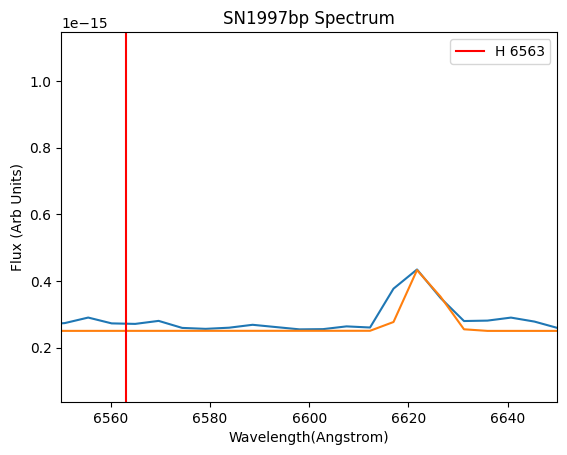

In [14]:
#first Attempt of a gaussian fit, for 1997bp spectrum
'''Typical galaxy lines in Angstroms
H 4341
H 4861
H 6563
NII 6548
NII 6583
OII 3727
OIII 4959
OIII 5007
NaI 5890
NaI 5896
MgII 2798
SII 6717
SII 6731
CaII 3969
CaII 3934
'''

pars= (0.25e-15, 0.2e-15, 6623, 3)
H, A, x0, sigma = pars
x=bpw
def gauss(pars, x):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

#plt.figure(figsize=(4, 4))
plt.plot(bpw,bpf)
plt.plot(bpw, gauss(pars, bpw))
plt.title('SN1997bp Spectrum')
plt.xlabel('Wavelength(Angstrom)')
plt.ylabel('Flux (Arb Units)')
plt.axvline(x=6563,color='red',label='H 6563')
plt.xlim([6550,6650])
plt.legend()
plt.show()

#this was a poor starting choice as the data is fairly rough and the fit isnt great so a new one will be chosen



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


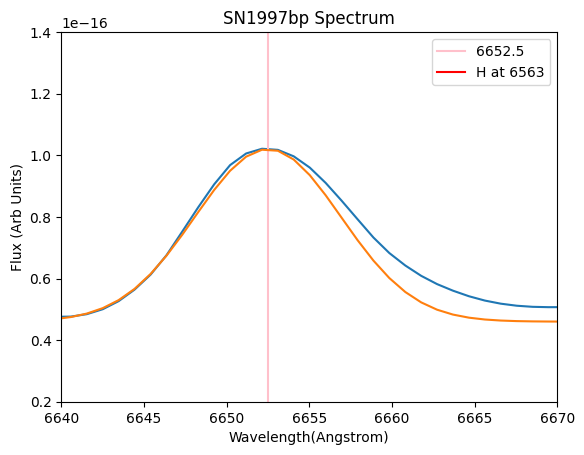

In [16]:
# nicer plot of gauss
from scipy.optimize import curve_fit

h, A, peak, sigma = 0.46e-16, 0.56e-16, 6652.5, 6.26
def Gauss(x, p, q):
  y = h + (A * (np.exp(-((x-peak)**2) / (sigma ** 2))))
  return y
parameters, covariance = curve_fit(Gauss, Ew, Ef)

fit_A = parameters[0]
fit_B = parameters[1]

fit_y = Gauss(Ew, fit_A, fit_B)

#plt.figure(figsize=(4, 4))
plt.plot(Ew, Ef)
plt.axvline(x=6652.5,color='pink',label='6652.5')
plt.plot(Ew, fit_y)
plt.title('SN1997bp Spectrum')
plt.xlabel('Wavelength(Angstrom)')
plt.ylabel('Flux (Arb Units)')
plt.axvline(x=6563,color='red',label='H at 6563')
plt.xlim([6640,6670])
plt.ylim([0.2e-16,1.4e-16])
plt.legend()
plt.show()

In [15]:
#Automating the above process:
HalphaReal=6563
from scipy.signal import find_peaks

def Gplot(h, A, peak, sigma, file,xlim,ylim,pkrange):
  w,f= np.loadtxt(file, unpack=True)

  avgf=0
  for i in range(len(f)):
    avgf+=f[i]
  avgf= (avgf/len(f))
  print('average flux=',avgf)
  def Gauss(x, p, q, peak):
    y = h + (A * (np.exp(-((x-peak)**2) / (sigma ** 2))))
    return y
  parameters, covariance = curve_fit(Gauss, w, f)

  fit_A = parameters[0]
  fit_B = parameters[1]

  fit_y = Gauss(w, fit_A, fit_B, peak)
  z=(peak-HalphaReal)/HalphaReal

  #plt.figure(figsize=(4, 4))
  plt.plot(w, f, label='Data')
  plt.axvline(x=peak,color='pink',label=('Observed Hα at',peak))
  plt.plot(w, fit_y,label='Fit')
  plt.title(file)
  plt.xlabel('Wavelength(Angstrom)')
  plt.ylabel('Flux (Arb Units)')
  #plt.axvline(x=HalphaReal,color='red',label='Real Hα at 6563')
  #plt.plot(peak, h+A,  marker="o", markersize=1, label=('Redshift=',z))
  plt.xlim(xlim)
  plt.ylim(ylim)
  plt.legend()
  plt.show()
  print(color.BOLD+'Redshift for',file,'=',z, color.END)
  print('Continuum Height=',h)
  print('Height of Gauss peak=',A)
  print('σ=',sigma)

average flux= 7.569671812077552e-17


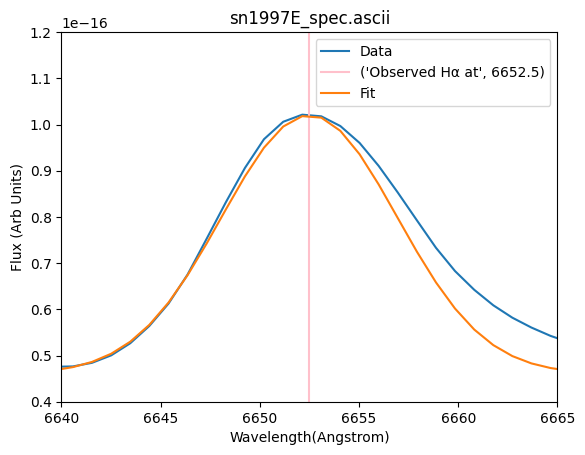

Redshift for sn1997E_spec.ascii = 0.013637056224287673 
Continuum Height= 4.6e-17
Height of Gauss peak= 5.6e-17
σ= 6.26
average flux= 3.957219477894741e-16


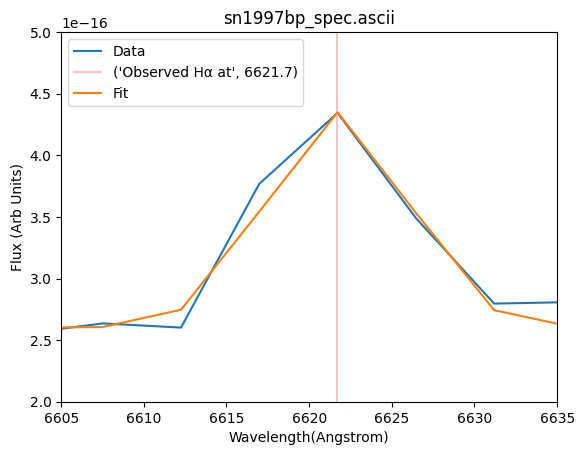

Redshift for sn1997bp_spec.ascii = 0.008944080451013229 
Continuum Height= 2.6e-16
Height of Gauss peak= 1.75e-16
σ= 6
average flux= 9.037928753289454e-16


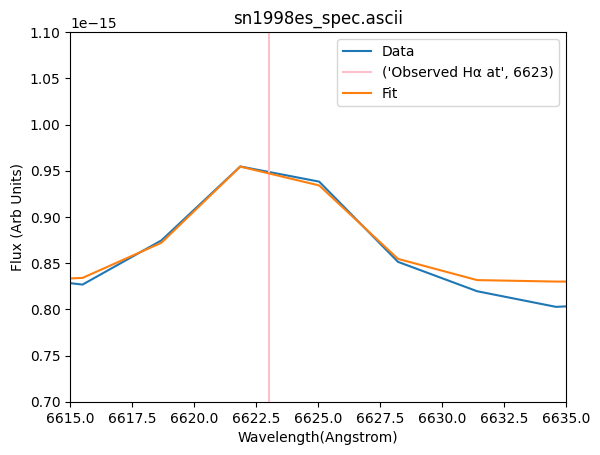

Redshift for sn1998es_spec.ascii = 0.009142160597287825 
Continuum Height= 8.3e-16
Height of Gauss peak= 1.35e-16
σ= 4
average flux= 0.3137106678691399


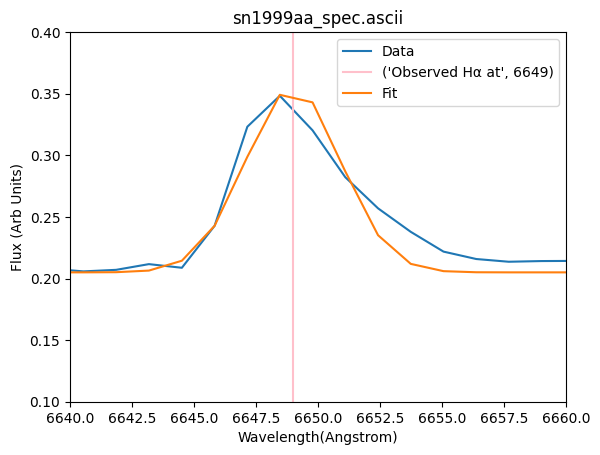

Redshift for sn1999aa_spec.ascii = 0.013103763522779217 
Continuum Height= 0.205
Height of Gauss peak= 0.15
σ= 2.7
average flux= 1.0817169133857718


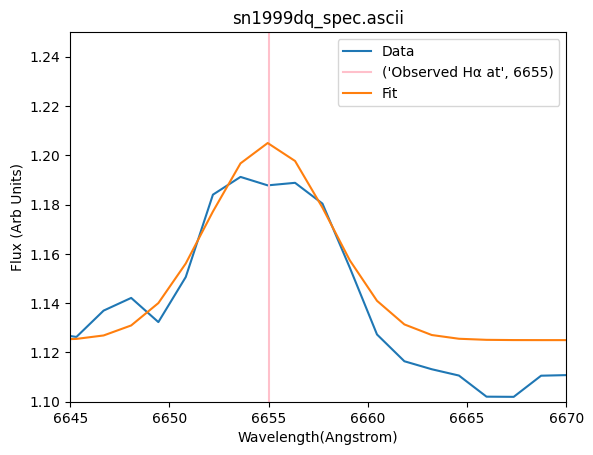

Redshift for sn1999dq_spec.ascii = 0.014017979582508 
Continuum Height= 1.125
Height of Gauss peak= 0.08
σ= 4.3
average flux= 1.5374540160219984e-16


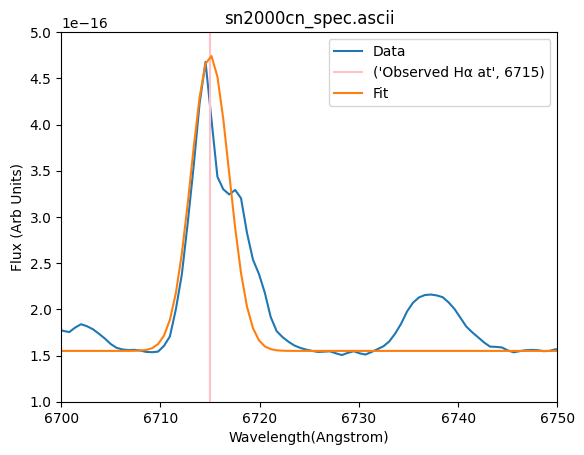

Redshift for sn2000cn_spec.ascii = 0.023160140179795827 
Continuum Height= 1.55e-16
Height of Gauss peak= 3.2e-16
σ= 2.7
average flux= 4.658985260869564e-16


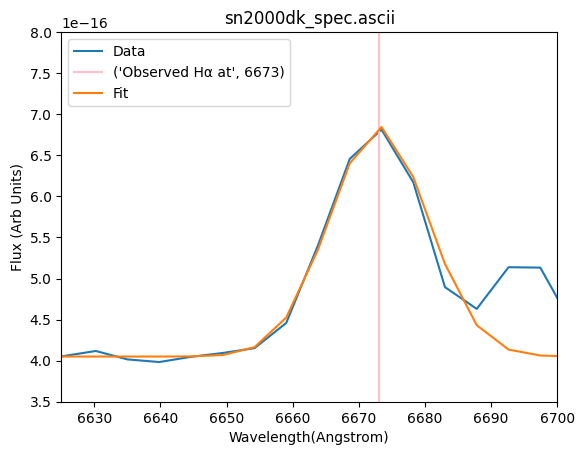

Redshift for sn2000dk_spec.ascii = 0.016760627761694347 
Continuum Height= 4.05e-16
Height of Gauss peak= 2.8e-16
σ= 10.5


In [17]:
#Plotting Gauss Curves and Finding redshifts as well as other parameters
Gplot(0.46e-16, 0.56e-16, 6652.5, 6.26, "sn1997E_spec.ascii",[6640,6665],[0.4e-16,1.2e-16],1.1e-16)
Gplot(0.26e-15, 0.175e-15, 6621.7, 6, "sn1997bp_spec.ascii",[6605,6635],[0.2e-15,0.5e-15],4e-16)
Gplot(0.83e-15, 0.135e-15, 6623, 4, "sn1998es_spec.ascii",[6615,6635],[0.7e-15,1.1e-15],0.9e-15)
Gplot(0.205, 0.15, 6649, 2.7, "sn1999aa_spec.ascii",[6640,6660],[0.1,0.4],0.2)
Gplot(1.125, 0.08, 6655, 4.3, "sn1999dq_spec.ascii",[6645,6670],[1.1,1.25],0.2)
Gplot(1.55e-16, 3.2e-16, 6715, 2.7, "sn2000cn_spec.ascii",[6700,6750],[1e-16,5e-16],0.2)
Gplot(4.05e-16, 2.8e-16, 6673, 10.5, "sn2000dk_spec.ascii",[6625,6700],[3.5e-16,8e-16],0.2)
#for finding peaks, find mean values of all peaks and use that

In [ ]:
#Now to just print Redshifts
def Redshifts(peak,file):
  z=(peak-HalphaReal)/HalphaReal
  print(color.BOLD+'Redshift for',file,'=',z, color.END)
  print()


Redshifts(6652.5,"sn1997E_spec.ascii")
Redshifts(6621.7,"sn1997bp_spec.ascii")
Redshifts(6623,"sn1998es_spec.ascii")
Redshifts(6649,"sn1999aa_spec.ascii")
Redshifts(6655,"sn1999dq_spec.ascii")
Redshifts(6715,"sn2000cn_spec.ascii")
Redshifts(6673,"sn2000dk_spec.ascii")

Redshift for sn1997E_spec.ascii = 0.013637056224287673 

Redshift for sn1997bp_spec.ascii = 0.008944080451013229 

Redshift for sn1998es_spec.ascii = 0.009142160597287825 

Redshift for sn1999aa_spec.ascii = 0.013103763522779217 

Redshift for sn1999dq_spec.ascii = 0.014017979582508 

Redshift for sn2000cn_spec.ascii = 0.023160140179795827 

Redshift for sn2000dk_spec.ascii = 0.016760627761694347 



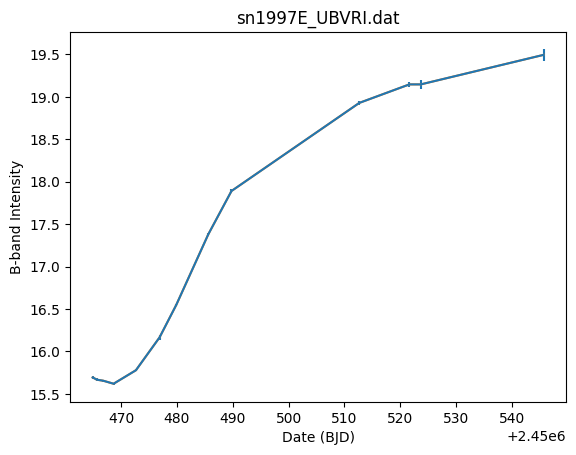

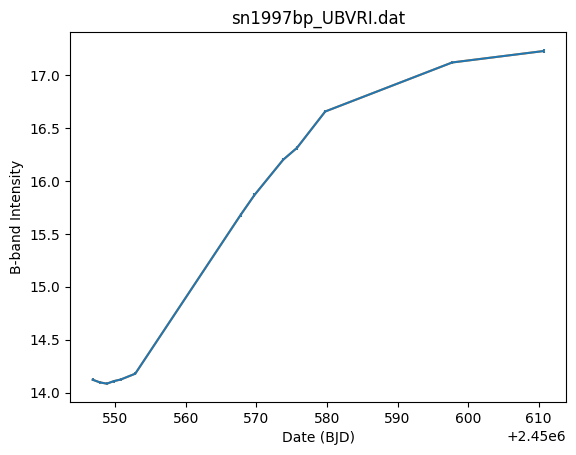

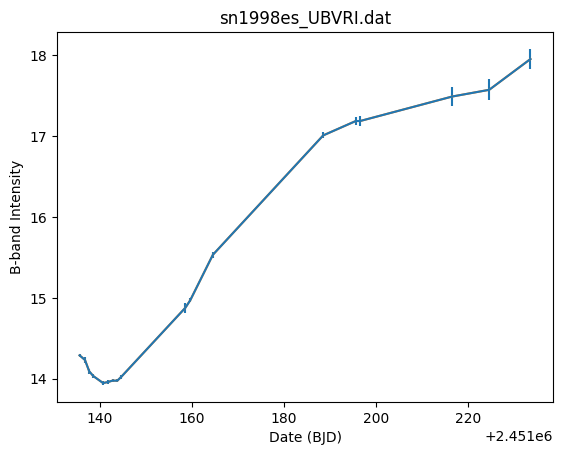

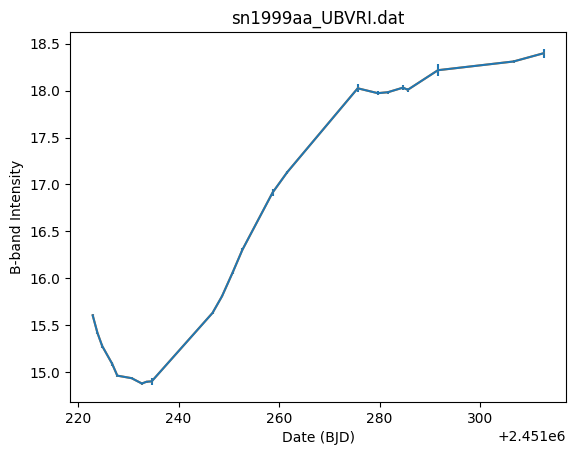

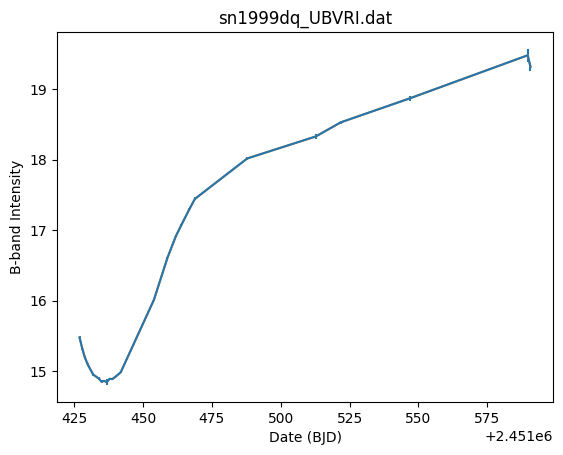

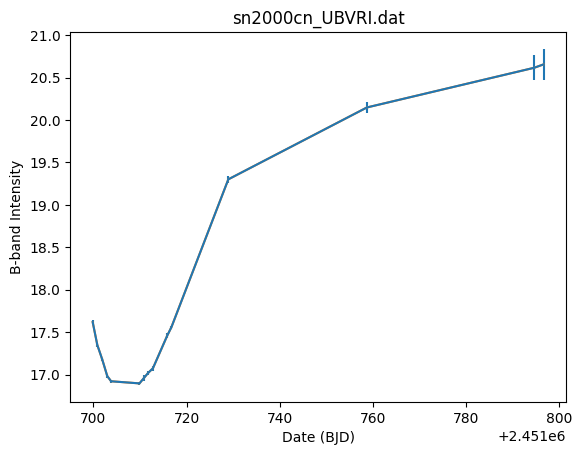

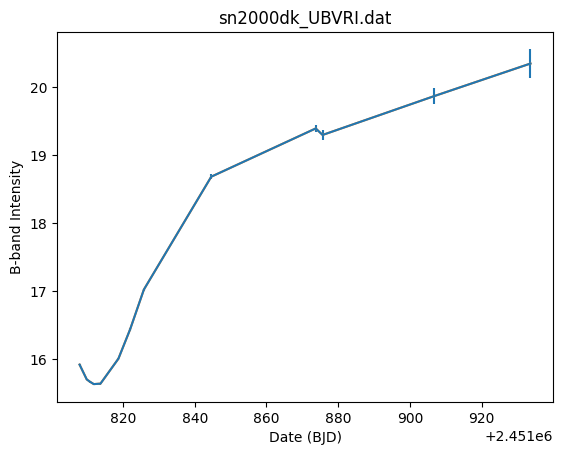

In [ ]:
#WEEK 1 PART B
def loading(file):
  #loading the data:
  Jdate, Umag, Uerr, Bmag,Berr, Vmag, Verr, Rmag, Rerr, Imag, Ierr=np.loadtxt(file, unpack=True)

  #Now to exclude days where no data was recorded:
  newB = [x for x in Bmag if x !=99.999]
  newerr = [x for x in Berr if x !=9.999]
  newJ=[]
  for i in range(len(Jdate)):
    if Bmag[i] != 99.999:
      newJ.append(Jdate[i])

  #Plotting the data:
  plt.errorbar(newJ, newB,
           yerr = newerr)
  plt.plot(newJ, newB)

  plt.title((file))
  plt.xlabel('Date (BJD)')
  plt.ylabel('B-band Intensity')
  plt.show()
  '''
  print('FOR',file,':')
  print('Julian Date=',Jdate)
  print('Bmag=',Bmag,'+/-',Berr)
  print(len(Bmag), len(Jdate))
  print(len(newJ),len(newB))
  print(newB)
  print(newJ)
  '''
loading('sn1997E_UBVRI.dat')
loading('sn1997bp_UBVRI.dat')
loading('sn1998es_UBVRI.dat')
loading('sn1999aa_UBVRI.dat')
loading('sn1999dq_UBVRI.dat')
loading('sn2000cn_UBVRI.dat')
loading('sn2000dk_UBVRI.dat')

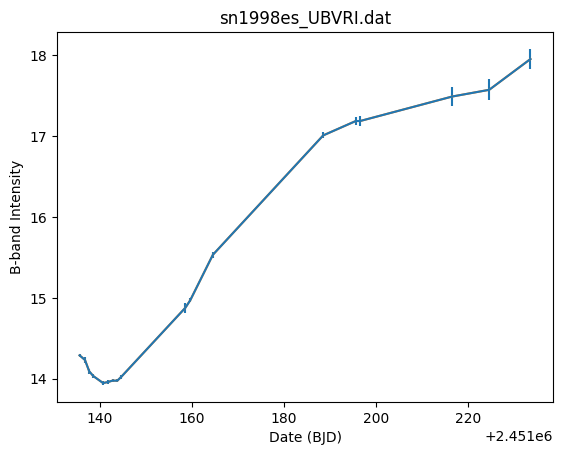

FOR sn1998es_UBVRI.dat :
Julian Date= [2451133.84 2451134.8  2451135.67 2451136.84 2451137.77 2451138.64
 2451140.78 2451141.82 2451142.84 2451143.86 2451144.72 2451158.65
 2451159.71 2451164.62 2451188.58 2451195.66 2451196.6  2451216.6
 2451224.63 2451233.6 ]
Bmag= [99.999 99.999 14.288 14.231 14.09  14.032 13.945 13.958 13.975 13.974
 14.022 14.877 14.97  15.532 17.009 17.187 17.187 17.49  17.573 17.954] +/- [9.999 9.999 0.021 0.032 0.027 0.022 0.023 0.026 0.022 0.017 0.025 0.059
 0.022 0.036 0.036 0.051 0.059 0.115 0.131 0.125]
20
20
18 18


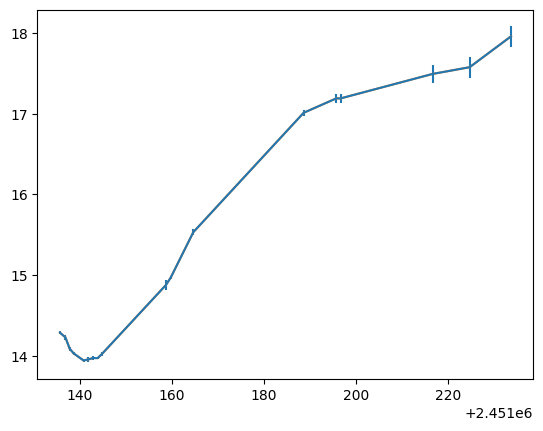

[2451135.67, 2451136.84, 2451137.77, 2451138.64, 2451140.78, 2451141.82, 2451142.84, 2451143.86, 2451144.72, 2451158.65, 2451159.71, 2451164.62, 2451188.58, 2451195.66, 2451196.6, 2451216.6, 2451224.63, 2451233.6]


In [ ]:

Jdate, Umag, Uerr, Bmag,Berr, Vmag, Verr, Rmag, Rerr, Imag, Ierr=np.loadtxt('sn1998es_UBVRI.dat', unpack=True)
print('FOR','sn1998es_UBVRI.dat',':')
print('Julian Date=',Jdate)
print('Bmag=',Bmag,'+/-',Berr)
print(len(Bmag))
print(len(Jdate))

#removing invalid data:
newB = [x for x in Bmag if x !=99.999]
newerr = [x for x in Berr if x !=9.999]
newJ=[]
for i in range(len(Jdate)):
  if Bmag[i] != 99.999:
    newJ.append(Jdate[i])
print(len(newJ),len(newB))

#plotting data
plt.errorbar(newJ, newB,
           yerr = newerr)
plt.plot(newJ, newB)
plt.show()
print(newJ)


In [5]:
#Now adding Z-value corrections (from part 1) and inverting the y-axis:
def loading_wz(file, z):
  #loading the data:
  Jdate, Umag, Uerr, Bmag,Berr, Vmag, Verr, Rmag, Rerr, Imag, Ierr=np.loadtxt(file, unpack=True)

  #Now to exclude days where no data was recorded:
  newB = [x for x in Bmag if x !=99.999]
  newerr = [x for x in Berr if x !=9.999]
  newJ=[]
  for i in range(len(Jdate)):
    if Bmag[i] != 99.999:
      newJ.append(Jdate[i] / (1 + z))     #Correction is done here while appending the function
  newB=np.array(newB)
  '''
  print('FOR',file,':')
  print('Julian Date=',Jdate)
  print('Bmag=',Bmag,'+/-',Berr)
  print(len(Bmag), len(Jdate))
  print(len(newJ),len(newB))
  print(newB)
  print(newJ)
  '''
  #Plotting the data:
  plt.errorbar(newJ, newB,
           yerr = newerr)
  plt.plot(newJ, newB)
  plt.gca().invert_yaxis()
  plt.title((file))
  plt.xlabel('Date (BJD)')
  plt.ylabel('Magnitude of B-band Intensity')
  plt.show()


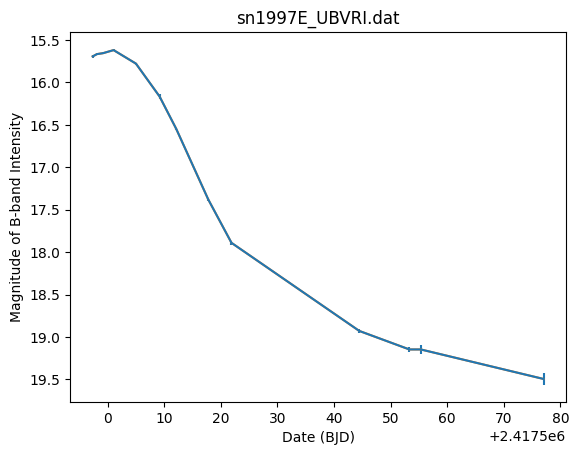

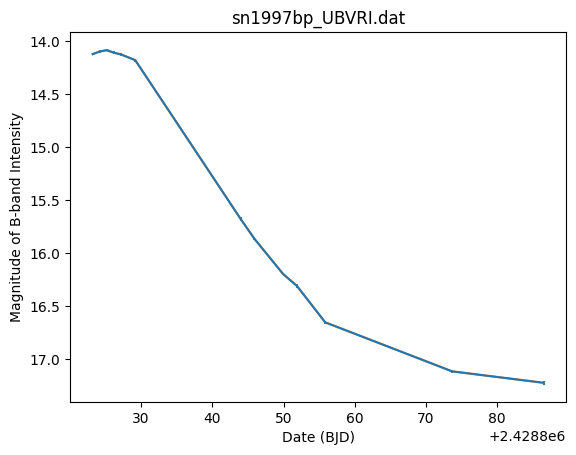

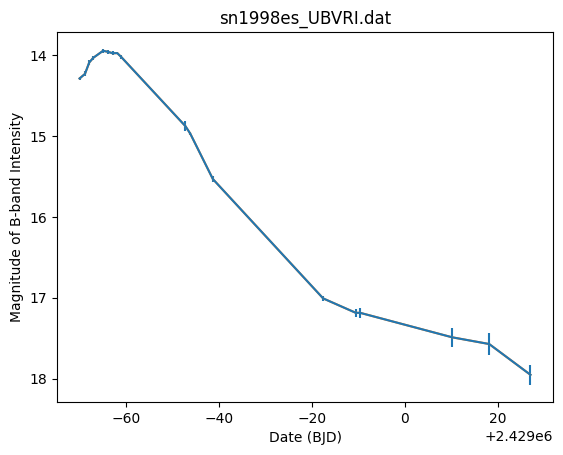

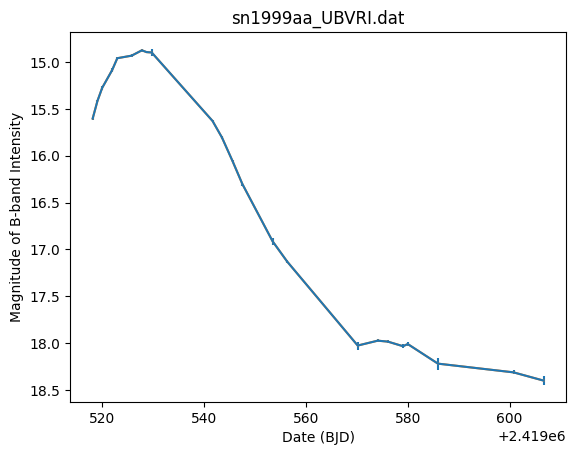

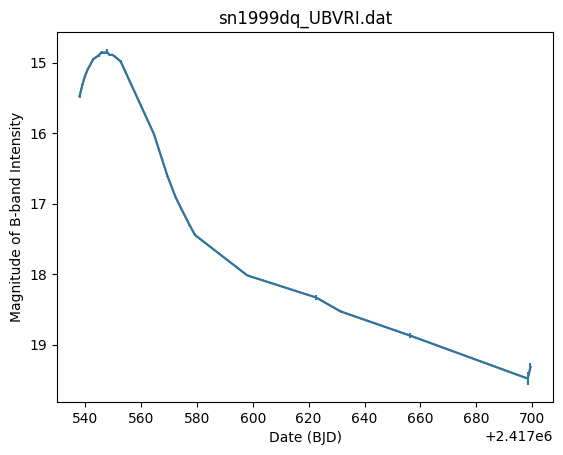

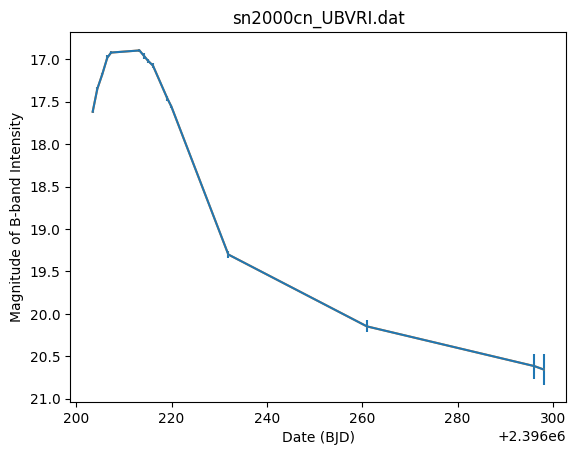

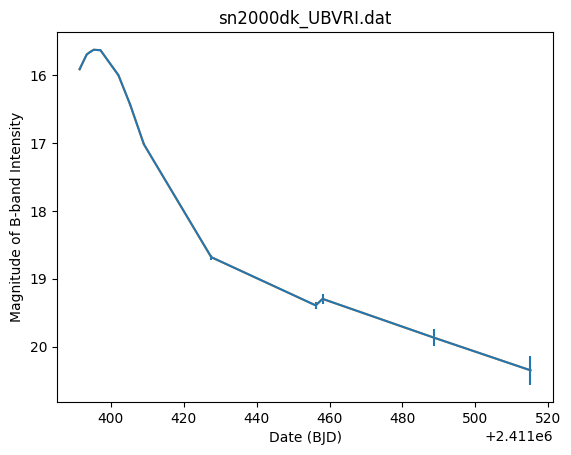

In [6]:
#using lists and loops to automate the above process
file_list=['sn1997E_UBVRI.dat','sn1997bp_UBVRI.dat','sn1998es_UBVRI.dat','sn1999aa_UBVRI.dat','sn1999dq_UBVRI.dat','sn2000cn_UBVRI.dat','sn2000dk_UBVRI.dat']
z_list=[0.013637056224287673 ,0.008944080451013229, 0.009142160597287825, 0.013103763522779217, 0.014017979582508, 0.023160140179795827, 0.016760627761694347]

for i in range(len(file_list)):
  loading_wz(file_list[i],z_list[i])

#this is nice, but the peak is our last measurement in all cases so we need to try something else

In [10]:
#loading function with z adjustments and polyfit to calculate change in flux 15 days after peak:

def polyfit(file, z):
  #same as before:
  Jdate, Umag, Uerr, Bmag,Berr, Vmag, Verr, Rmag, Rerr, Imag, Ierr=np.loadtxt(file, unpack=True)
  newB = [x for x in Bmag if x !=99.999]
  newerr = [x for x in Berr if x !=9.999]
  newJ=[]
  for i in range(len(Jdate)):
    if Bmag[i] != 99.999:
      newJ.append(Jdate[i] /  (1 + z))

  newB=np.array(newB)
  newJ=np.array(newJ)
  print(np.min(newB))

  #now using np.polyfit to calculate flux change
  min=20
  peak=0
  fitx=[]
  fity=[]

  for i in range(len(newB)):
    if newB[i]<=min:
      min=newB[i]
      peak=i

  newJ -= newJ[peak]
  for i in range(len(newJ)):

    fitx.append(newJ[i])
    fity.append(newB[i])


  fifteenday=((newJ[peak])+30)
  #print(((newJ[end])+15) - newJ[end])
  print('peak index=',peak)

  ft=0
  for i in range(7):
    if newJ[peak + i] <= (fifteenday):
      fitx.append(newJ[peak + i])
      fity.append(newB[peak + i])
  '''
  print(fitx[0], fitx[-1])
  print(len(fitx),len(fity))
  '''
  fit= np.polyfit( fitx, fity, 7)
  p = np.poly1d(fit)
  print(p((newJ[peak])+15))
  t = np.linspace(fitx[0], fitx[-1], 10)   #THIS DATA STARTS AT START OF NEWJ AND ENDS 15 DAYS AFTER IT
  #print(t, p(t))
  plt.errorbar(newJ, newB,
           yerr = newerr
               ,label=('file data'))

  plt.plot(newJ, newB, '-')
  plt.plot(t, p(t), '-', label='polyfit',linewidth=4)
  plt.grid(True)
  plt.title((file))
  plt.axvline(x=(newJ[peak]), color='black')
  plt.axvline(x=((newJ[peak])+15), color='black')
  plt.axhline(y=(p(newJ[peak]+15)),linestyle='dashed',color='purple',label='B-Mag 15 days after peak')
  plt.axhline(y=(p((newJ[peak]))),linestyle='dashed',color='magenta',label='B-Mag peak')
  #plt.axhline(y=np.min(newB),linestyle='dashed',color='purple',label='Peak B-Mag')
  plt.gca().invert_yaxis()
  #plt.xlim(newJ[0], fifteenday+5)
  plt.legend()
  plt.xlabel('Date (BJD)')
  plt.ylabel('Magnitude of B-band Intensity')
  plt.show()

  #deltam15 calculated as peak of file data minus the yvalue at the end of the polyfit
  deltam15=(p((newJ[peak])+15) - p(newJ[peak]))
  print(color.BOLD+'Δm_15(B) for',file,'=',deltam15,'+/-',(newerr[peak] + (newerr[peak+7])), color.END)

  return deltam15

15.62
peak index= 3
17.128910757142688


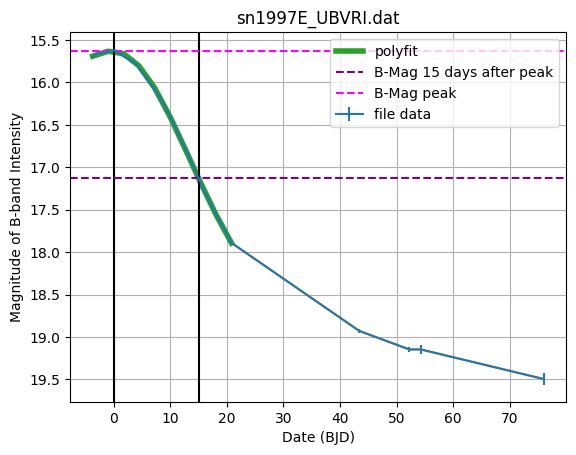

Δm_15(B) for sn1997E_UBVRI.dat = 1.4978800806011954 +/- 0.042 
15.62
peak index= 3
17.128910757142688


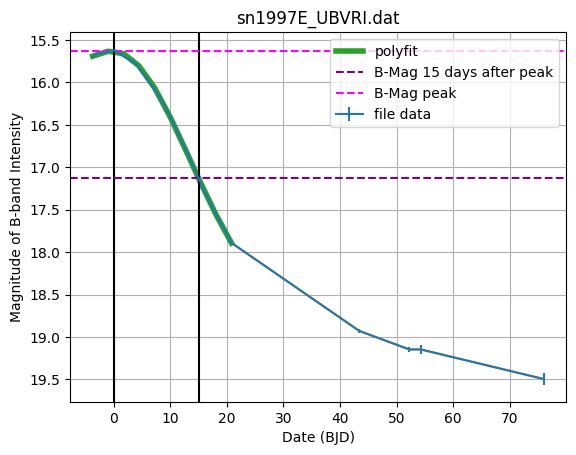

Δm_15(B) for sn1997E_UBVRI.dat = 1.4978800806011954 +/- 0.042 
14.085
peak index= 2
15.283296026521207


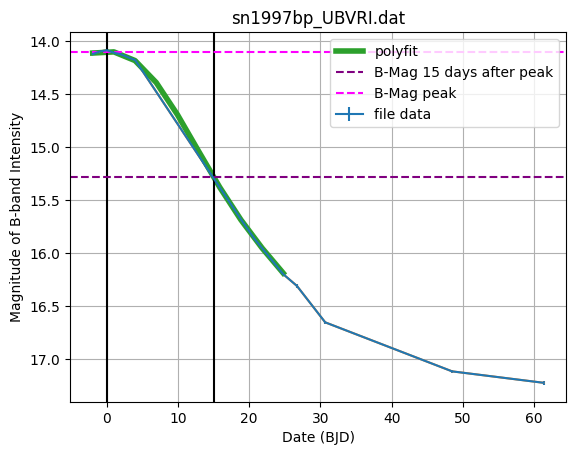

Δm_15(B) for sn1997bp_UBVRI.dat = 1.184506414105659 +/- 0.027 
14.085
peak index= 2
15.283296026521207


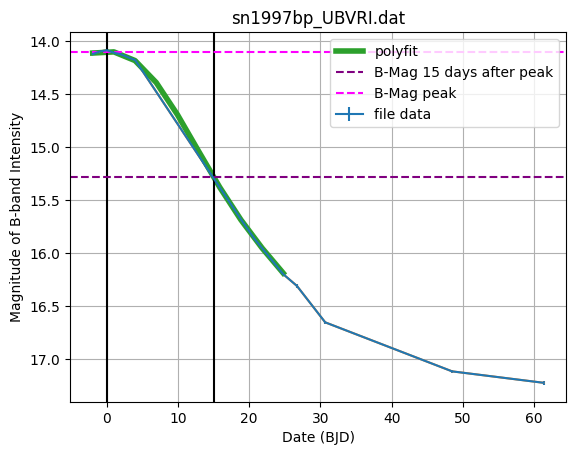

Δm_15(B) for sn1997bp_UBVRI.dat = 1.184506414105659 +/- 0.027 
13.945
peak index= 4
14.64401643911466


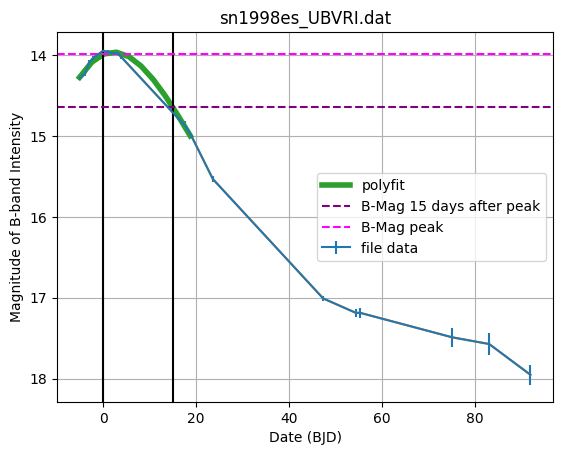

Δm_15(B) for sn1998es_UBVRI.dat = 0.6555308381886142 +/- 0.059 
13.945
peak index= 4
14.64401643911466


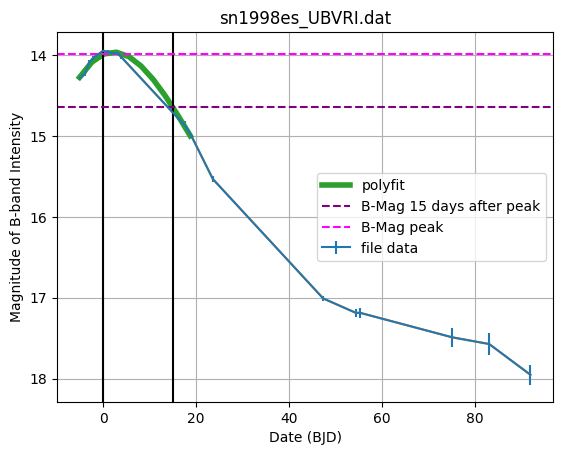

Δm_15(B) for sn1998es_UBVRI.dat = 0.6555308381886142 +/- 0.059 
14.876
peak index= 6
15.77002415560685


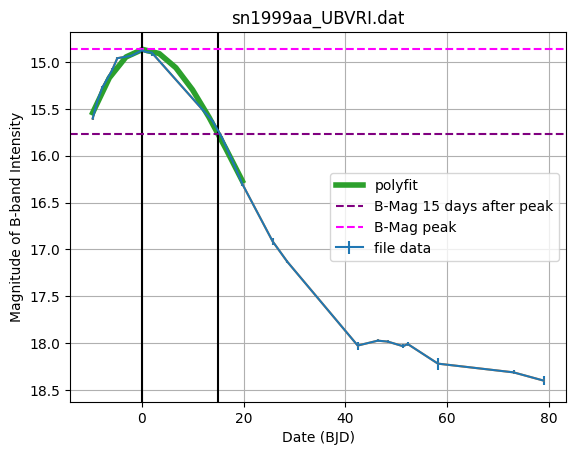

Δm_15(B) for sn1999aa_UBVRI.dat = 0.9033354381721015 +/- 0.055 
14.876
peak index= 6
15.77002415560685


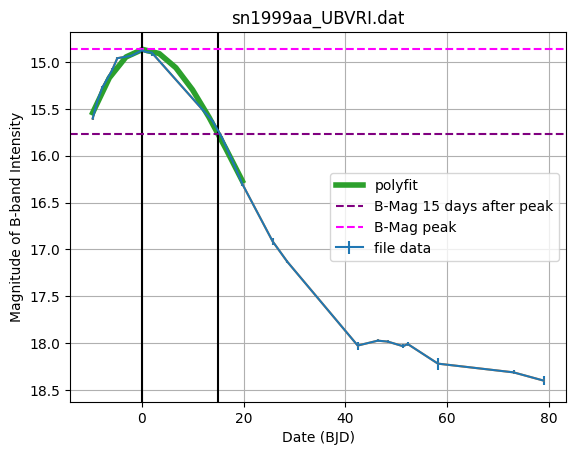

Δm_15(B) for sn1999aa_UBVRI.dat = 0.9033354381721015 +/- 0.055 
14.845
peak index= 8
15.938533572150867


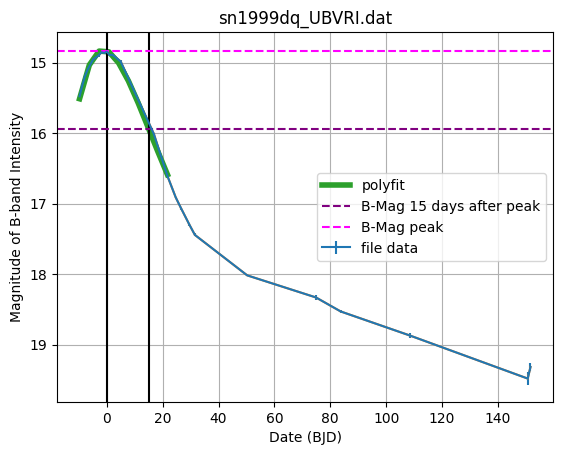

Δm_15(B) for sn1999dq_UBVRI.dat = 1.1076988968390733 +/- 0.05 
14.845
peak index= 8
15.938533572150867


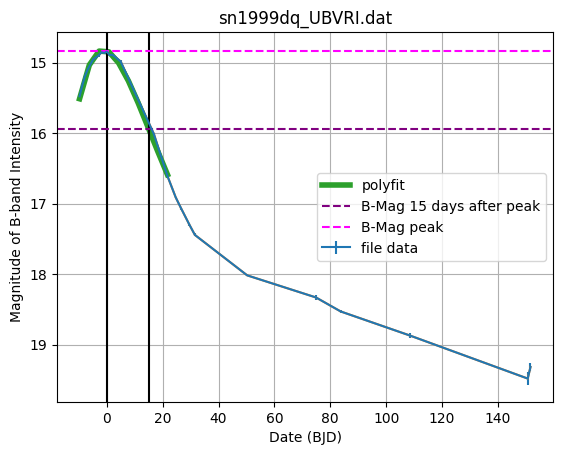

Δm_15(B) for sn1999dq_UBVRI.dat = 1.1076988968390733 +/- 0.05 
16.896
peak index= 5
18.75480681664452


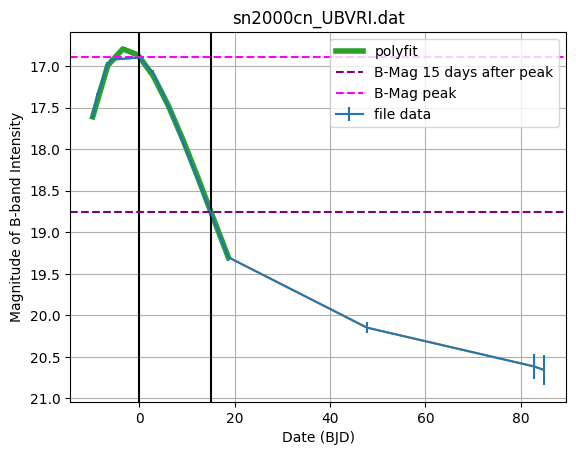

Δm_15(B) for sn2000cn_UBVRI.dat = 1.870876109234061 +/- 0.08800000000000001 
16.896
peak index= 5
18.75480681664452


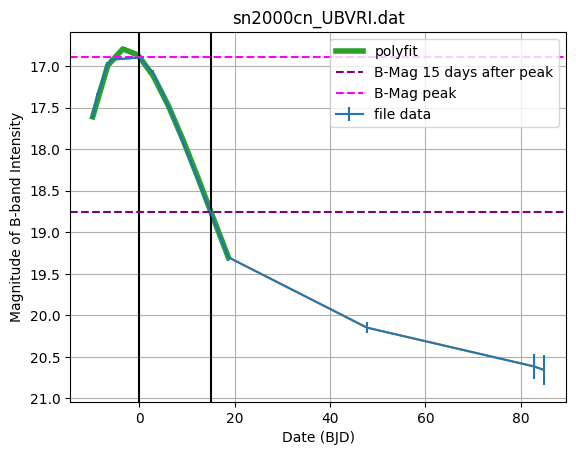

Δm_15(B) for sn2000cn_UBVRI.dat = 1.870876109234061 +/- 0.08800000000000001 
15.63
peak index= 3
17.13730077127243


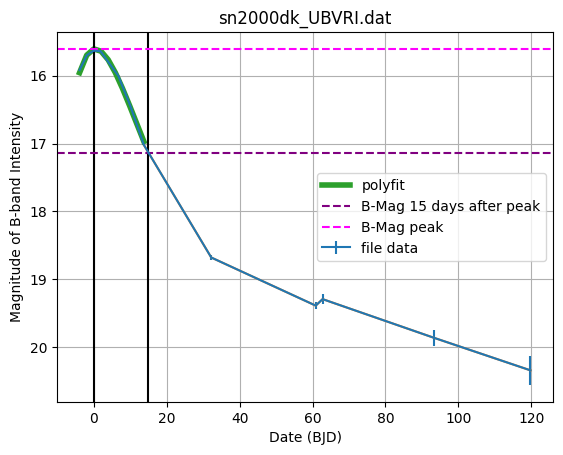

Δm_15(B) for sn2000dk_UBVRI.dat = 1.5328939369445305 +/- 0.082 
15.63
peak index= 3
17.13730077127243


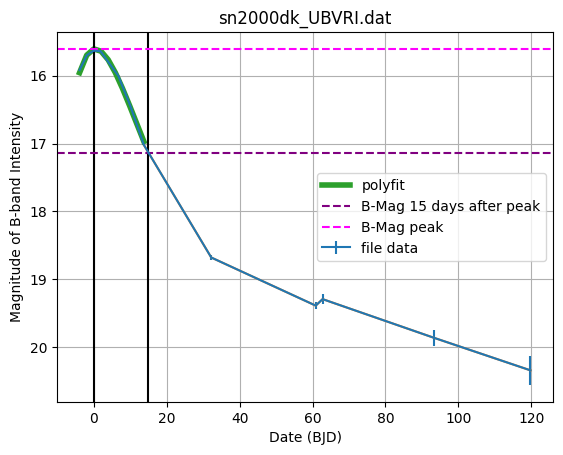

Δm_15(B) for sn2000dk_UBVRI.dat = 1.5328939369445305 +/- 0.082 
Δm_15(B) Values= [1.4978800806011954, 1.184506414105659, 0.6555308381886142, 0.9033354381721015, 1.1076988968390733, 1.870876109234061, 1.5328939369445305]


In [11]:
#now using a loop to automate the process for all light curves
deltaMs=[]

for i in range(len(file_list)):
  polyfit(file_list[i],z_list[i])
  deltaMs.append(polyfit(file_list[i], z_list[i]))

print('Δm_15(B) Values=',deltaMs)
#LAST THING TO DO IS USE SET ERRORS AND ERRORS FROM POLYFIT TO EVAULUATE ACCURACY

<ipython-input-22-07bf039613f2>:36: RankWarning: Polyfit may be poorly conditioned
  fit= np.polyfit( fitx, fity, 20)
<ipython-input-22-07bf039613f2>:36: RankWarning: Polyfit may be poorly conditioned
  fit= np.polyfit( fitx, fity, 20)
<ipython-input-22-07bf039613f2>:36: RankWarning: Polyfit may be poorly conditioned
  fit= np.polyfit( fitx, fity, 20)
<ipython-input-22-07bf039613f2>:36: RankWarning: Polyfit may be poorly conditioned
  fit= np.polyfit( fitx, fity, 20)
<ipython-input-22-07bf039613f2>:36: RankWarning: Polyfit may be poorly conditioned
  fit= np.polyfit( fitx, fity, 20)
<ipython-input-22-07bf039613f2>:36: RankWarning: Polyfit may be poorly conditioned
  fit= np.polyfit( fitx, fity, 20)
<ipython-input-22-07bf039613f2>:36: RankWarning: Polyfit may be poorly conditioned
  fit= np.polyfit( fitx, fity, 20)


SLOPE= -2.2433611287976127


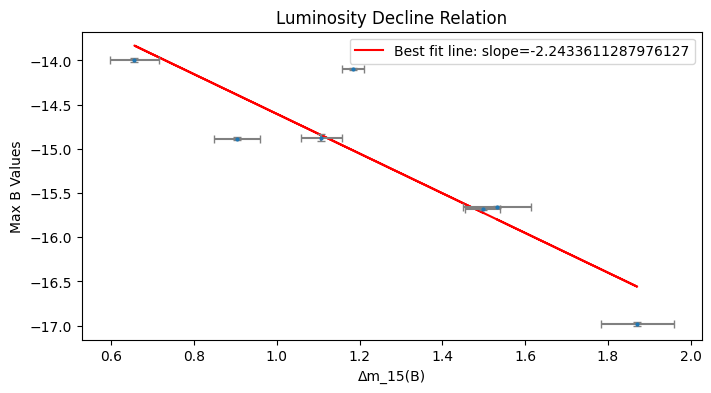

In [22]:
#PART C i)
def Bmax(file, z):
  Jdate, Umag, Uerr, Bmag,Berr, Vmag, Verr, Rmag, Rerr, Imag, Ierr=np.loadtxt(file, unpack=True)
  newB = [x for x in Bmag if x !=99.999]
  newerr = [x for x in Berr if x !=9.999]
  newJ=[]
  for i in range(len(Jdate)):
    if Bmag[i] != 99.999:
      newJ.append(Jdate[i] /  (1 + z))

  newB=np.array(newB)


  min=20
  peak=0
  fitx=[]
  fity=[]

  for i in range(len(newB)):
    if newB[i]<=min:
      min=newB[i]
      peak=i
      fitx.append(newJ[i])
      fity.append(newB[i])

  fifteenday=((newJ[peak])+30)


  ft=0
  for i in range(7):
    if newJ[peak + i] <= (fifteenday):
      fitx.append(newJ[peak + i])
      fity.append(newB[peak + i])


  fit= np.polyfit( fitx, fity, 20)
  p = np.poly1d(fit)
  t = np.linspace(fitx[0], fitx[-1], 10)
  return p(newJ[peak]), newerr[peak],(newerr[peak] + (newerr[peak+7]))  # Return Bmax value and error value

Bmaxs = []
yerrorbars = []
xerrorbars=[]
for i in range(len(file_list)):
    Bmax_val, yerror_val, xerror_val = Bmax(file_list[i], z_list[i])  # Call Bmax function and get Bmax value and error value
    Bmaxs.append(-Bmax_val)  # Append Bmax value to Bmaxs list
    yerrorbars.append(yerror_val) #append errors
    xerrorbars.append(xerror_val)


a, b = np.polyfit(deltaMs, Bmaxs, 1)
plt.figure(figsize=(8, 4))
plt.plot(deltaMs, a*np.array(deltaMs) + b, color='red', label='Best fit line: slope={}'.format(a))
plt.errorbar(deltaMs, Bmaxs,xerr=xerrorbars, yerr=yerrorbars, fmt='o',markersize=2, ecolor='gray', capsize=3)
plt.legend()
plt.xlabel('Δm_15(B)')
plt.ylabel('Max B Values')
plt.title('Luminosity Decline Relation')
print('SLOPE=',a)
plt.show()



In [27]:
#correcting B values
#C ii)
def corrB(slope, file, z, deltaM):
  #same as before:
  Jdate, Umag, Uerr, Bmag,Berr, Vmag, Verr, Rmag, Rerr, Imag, Ierr=np.loadtxt(file, unpack=True)
  newB = [x for x in Bmag if x !=99.999]
  newerr = [x for x in Berr if x !=9.999]
  newJ=[]
  for i in range(len(Jdate)):
    if Bmag[i] != 99.999:
      newJ.append(Jdate[i] /  (1 + z))
  newB= newB - slope*(deltaM -1.1)
  newB=np.array(newB)
  newJ=np.array(newJ)
  print(np.min(newB))
  '''min=np.min(newB)
  minend= np.min(newB) -1

  indicies = [(np.where((newB<=min & newB<=minend)))][0][0]
  start=indicies[0]
  end=indicies[-1]

  INT=newB[start:end]
  BJD=newJ[start:end]


  print(find_peaks(INT,pkrange))
  print(BJD)'''


  #now using np.polyfit to calculate flux change
  min=20
  peak=0
  fitx=[]
  fity=[]

  for i in range(len(newB)):
    if newB[i]<=min:
      min=newB[i]
      peak=i

  newJ -= newJ[peak]
  for i in range(len(newJ)):

    fitx.append(newJ[i])
    fity.append(newB[i])


  fifteenday=((newJ[peak])+30)
  #print(((newJ[end])+15) - newJ[end])
  print('peak index=',peak)

  ft=0
  for i in range(7):
    if newJ[peak + i] <= (fifteenday):
      fitx.append(newJ[peak + i])
      fity.append(newB[peak + i])
  '''
  print(fitx[0], fitx[-1])
  print(len(fitx),len(fity))
  '''
  fit= np.polyfit( fitx, fity, 7)
  p = np.poly1d(fit)
  print(p((newJ[peak])+15))
  t = np.linspace(fitx[0], fitx[-1], 10)   #THIS DATA STARTS AT START OF NEWJ AND ENDS 15 DAYS AFTER IT
  #print(t, p(t))
  plt.errorbar(newJ, newB,
           yerr = newerr
               ,label=('file data'))

  plt.plot(newJ, newB, '-')
  plt.plot(t, p(t), '-', label='polyfit',linewidth=4)
  plt.grid(True)
  plt.title((file))
  plt.axvline(x=(newJ[peak]), color='black')
  plt.axvline(x=((newJ[peak])+15), color='black')
  plt.axhline(y=(p(newJ[peak]+15)),linestyle='dashed',color='purple',label='B-Mag 15 days after peak')
  plt.axhline(y=(p((newJ[peak]))),linestyle='dashed',color='magenta',label='B-Mag peak')
  #plt.axhline(y=np.min(newB),linestyle='dashed',color='purple',label='Peak B-Mag')
  plt.gca().invert_yaxis()
  #plt.xlim(newJ[0], fifteenday+5)
  plt.legend()
  plt.xlabel('Date (BJD)')
  plt.ylabel('B-band Intensity')
  plt.show()

  #findign correct peak
  print(color.BOLD+'Corrected Peak mB for',file,'=', p(newJ[peak]),'+/-',(newerr[peak] - slope*(deltaM -1.1)), color.END)

  return p(newJ[peak])


16.51969665641377
peak index= 3
18.01853528016884


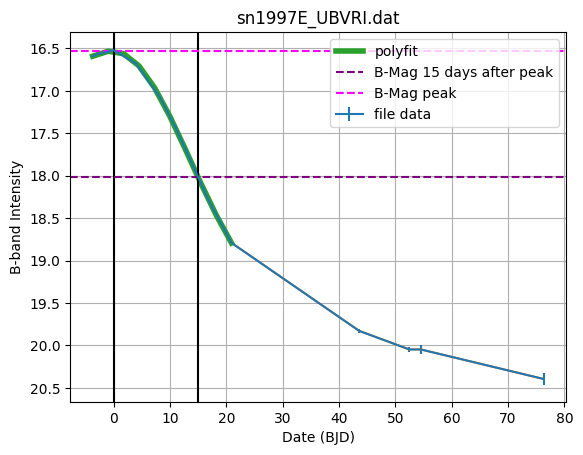

Corrected Peak mB for sn1997E_UBVRI.dat = 16.530727332958822 +/- 0.9136966564137735 
14.276088073827415
peak index= 2
15.474717442909611


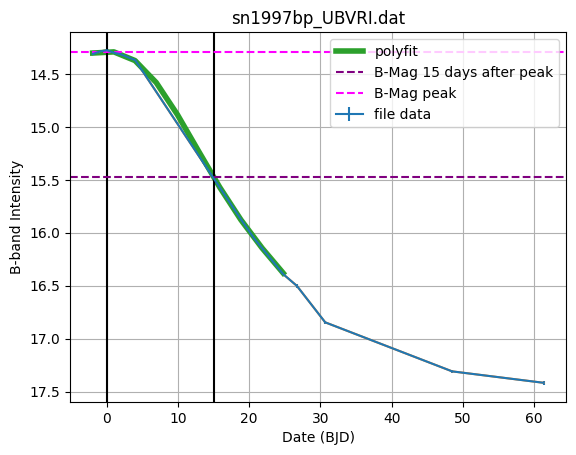

Corrected Peak mB for sn1997bp_UBVRI.dat = 14.289877686241391 +/- 0.20308807382741492 
12.93995491667613
peak index= 4
13.64426125957917


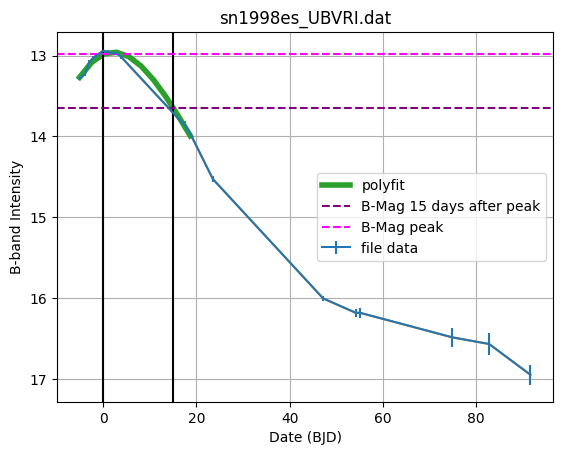

Corrected Peak mB for sn1998es_UBVRI.dat = 12.98344051759771 +/- -0.9820450833238695 
14.431297042153286
peak index= 6
15.326128001947604


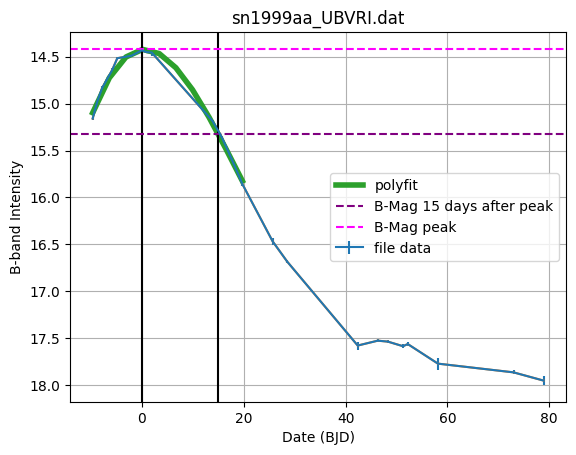

Corrected Peak mB for sn1999aa_UBVRI.dat = 14.421985759584782 +/- -0.42970295784671314 
14.862408943251753
peak index= 8
15.955942515402636


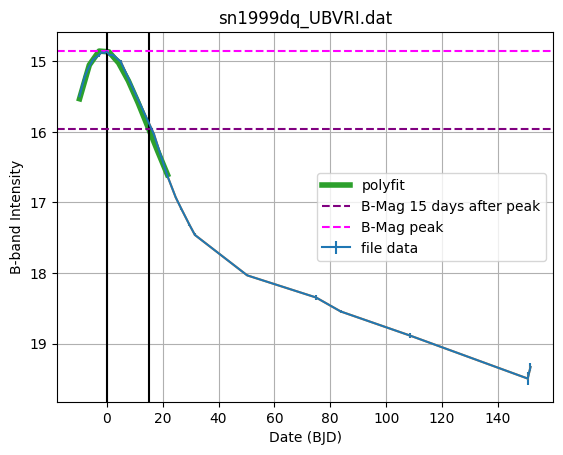

Corrected Peak mB for sn1999dq_UBVRI.dat = 14.848243618563533 +/- 0.05640894325175204 
18.639124855456913
peak index= 5
20.483729995512814


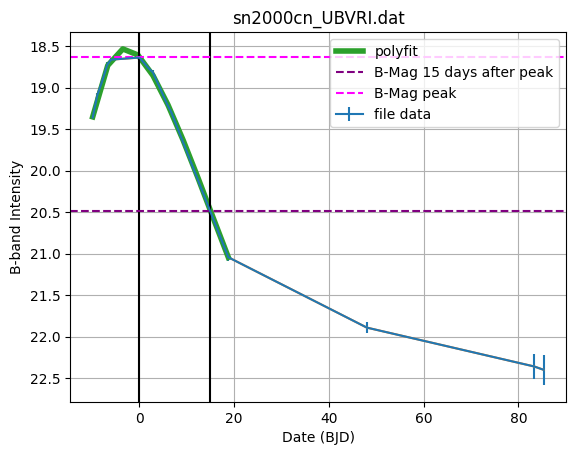

Corrected Peak mB for sn2000cn_UBVRI.dat = 18.627055562862196 +/- 1.7611248554569128 
16.60887088758577
peak index= 3
18.128453344703452


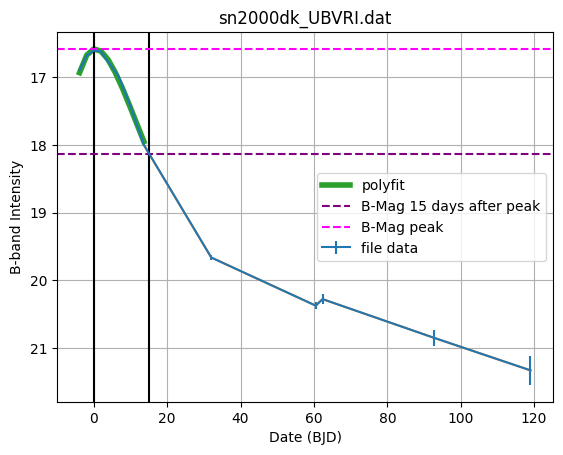

Corrected Peak mB for sn2000dk_UBVRI.dat = 16.583277721913344 +/- 0.9908708875857678 
[16.530727332958822, 14.289877686241391, 12.98344051759771, 14.421985759584782, 14.848243618563533, 18.627055562862196, 16.583277721913344]


In [30]:
corrBmaxs=[]
for i in range(len(file_list)):
  corrBmaxs.append(corrB(-2.261225681502666, file_list[i], z_list[i], deltaMs[i]))
print(corrBmaxs)

[13.997688323259354, 14.884638518095016, 15.68121574819088, 14.094116657972336, 14.873952150344849, 16.98214888572693, 15.66253286600113]
[15.166096031665802, 15.59755676984787, 15.359476774930954, 14.22529648244381, 15.548099279403687, 16.21834045648575, 14.678494274616241]


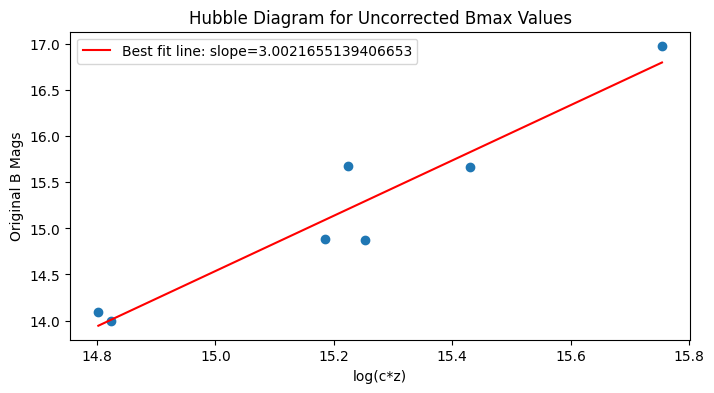

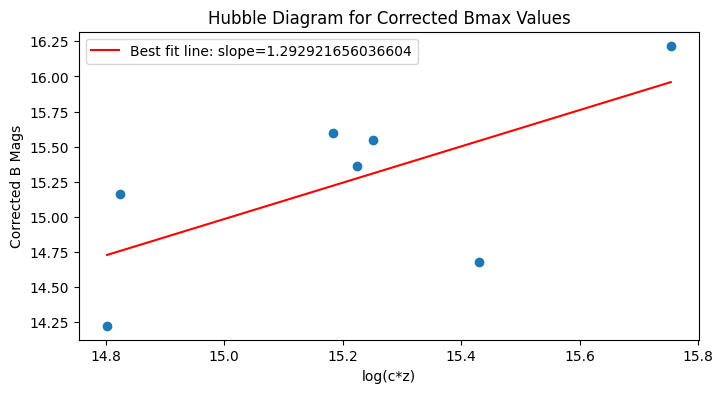

[[1.         0.95882365]
 [0.95882365 1.        ]]
[[1.         0.65963655]
 [0.65963655 1.        ]]


In [32]:
recvel=[]
z_list=[0.013637056224287673 ,0.008944080451013229, 0.009142160597287825, 0.013103763522779217, 0.014017979582508, 0.023160140179795827, 0.016760627761694347]

def sort_list(list1, list2):

    zipped_pairs = zip(list2, list1)

    zp = [x for _, x in sorted(zipped_pairs)]

    return zp


print(sort_list(Bmaxs,z_list))
print(sort_list(corrBmaxs, z_list))

#sorted:
corrBmaxs=[14.22529648244381, 15.166096031665802, 15.59755676984787, 15.359476774930954, 15.548099279403687, 14.678494274616241, 16.21834045648575]
Bmaxs=[14.094116657972336, 13.997688323259354, 14.884638518095016, 15.68121574819088, 14.873952150344849, 15.66253286600113, 16.98214888572693]
z_list.sort()

Hnought=73.8
for i in range(len(z_list)):
  rv=3e8 * z_list[i]
  recvel.append(np.log(rv))

n, m = np.polyfit(recvel, Bmaxs, 1)

plt.figure(figsize=(8,4))
plt.title('Hubble Diagram for Uncorrected Bmax Values')
plt.scatter(recvel, Bmaxs)
plt.plot(recvel, n*np.array(recvel) + m, color='red', label='Best fit line: slope={}'.format(n))
plt.legend()
#plt.xscale("log")
plt.xlabel('log(c*z)')
plt.ylabel('Original B Mags')
plt.show()

k, l = np.polyfit(recvel, corrBmaxs, 1)

plt.figure(figsize=(8,4))
plt.title('Hubble Diagram for Corrected Bmax Values')
plt.scatter(recvel, corrBmaxs)
plt.plot(recvel, k*np.array(recvel) + l, color='red', label='Best fit line: slope={}'.format(k))
plt.legend()
#plt.xscale("log")
plt.xlabel('log(c*z)')
plt.ylabel('Corrected B Mags')
plt.show()
print(np.corrcoef(Bmaxs, recvel))
print(np.corrcoef(corrBmaxs,recvel))

         Name      zcmb      zhel  error         mb  error_mb        X1  \
0      03D1au  0.503084  0.504300      0  23.001698  0.088031  1.273191   
1      03D1aw  0.580724  0.582000      0  23.573937  0.090132  0.974346   
2      03D1ax  0.494795  0.496000      0  22.960139  0.088110 -0.728837   
3      03D1bp  0.345928  0.347000      0  22.398137  0.087263 -1.155110   
4      03D1co  0.677662  0.679000      0  24.078115  0.098356  0.618820   
..        ...       ...       ...    ...        ...       ...       ...   
735  sn2007co  0.027064  0.026962      0  16.504006  0.141685 -0.137806   
736  sn2007cq  0.025468  0.025918      0  15.797848  0.143429 -0.657941   
737   sn2007f  0.023810  0.023590      0  15.895501  0.144315  0.618766   
738  sn2007qe  0.023867  0.024000      0  16.068268  0.144350  0.760605   
739  sn2008bf  0.022068  0.021275      0  15.718540  0.144685  0.430639   

     error_X1         c   error_c  ...  Mst_lower  logSFR  SFR_upper  \
0    0.150058 -0.012353  0.

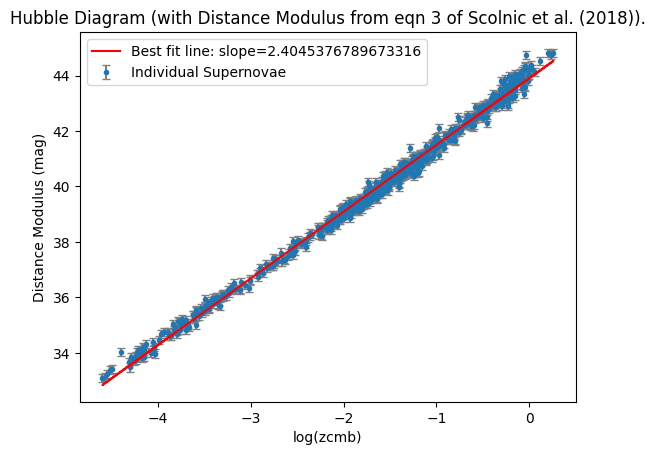

In [33]:
#WEEK 2 WORK - Hubble Diagram

#import pandas to read data from file
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('Allsupernovae.csv')
#readme=('Files')
print(data)

#extracting / defining parameters
mb=data.mb
mberr=data.error_mb

X1=data.X1
X1err=data.error_X1

zcmb=data.zcmb

c=data.c
cerr=data.error_c

alpha = 0.141
alphaerr= 0.006

beta= 3.101
betaerr=0.075

Mb= -19.05
Mberr=0.02

delM= -0.07
delMerr=0.02


mus=[]
muerrs=[]

#define distance modulus and append list
for i in range(len(mb)):
  mu=mb[i] -Mb + alpha*(X1[i]) - beta*(c[i])
  mus.append(mu)
  muerrs=np.sqrt(mberr[i]**2 + (alphaerr * X1err)**2 + (betaerr * cerr[i])**2 + Mberr**2)


#plotting the data
plt.xlabel('log(zcmb)')
plt.ylabel('Distance Modulus (mag)')

plt.errorbar(np.log(zcmb), mus, yerr = muerrs, fmt ='o',markersize=3, ecolor='gray', capsize=3, zorder=1, label='Individual Supernovae')
#polyfit just to find a slope for the data
k, l = np.polyfit(np.log(zcmb), mus, 1)
plt.plot(np.log(zcmb), k*np.log((zcmb))+l, color='red', label='Best fit line: slope={}'.format(k))
plt.legend()
plt.title('Hubble Diagram (with Distance Modulus from eqn 3 of Scolnic et al. (2018)).')
plt.show()

Massless Model Error = 0.015316503965978868


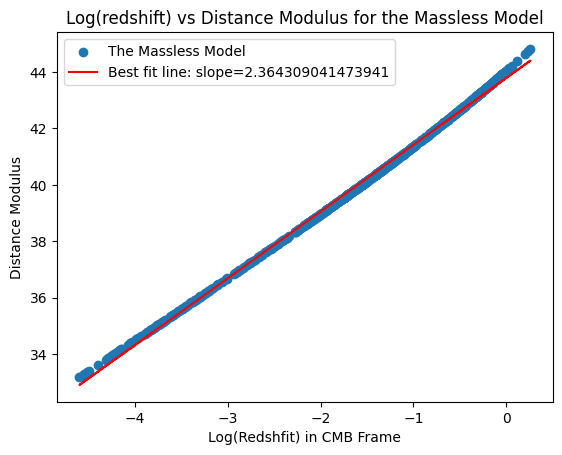

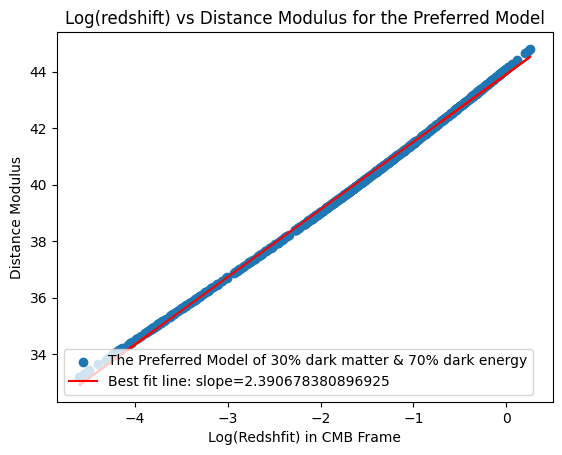

CHI ERROR OF PREFERRED MODEL = 0.01350959859475949


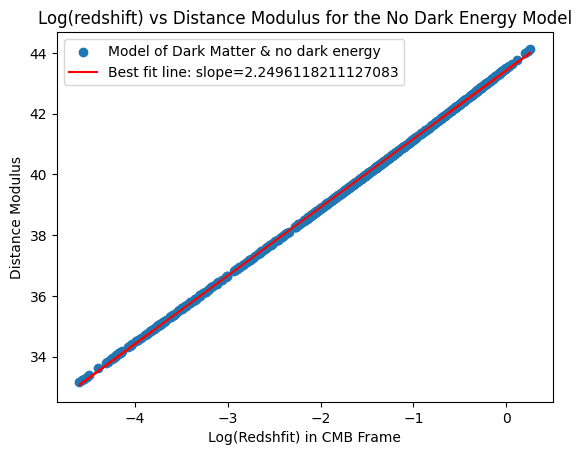

CHI ERROR OF NO DARK ENERGY MODEL = 0.050043573151916806


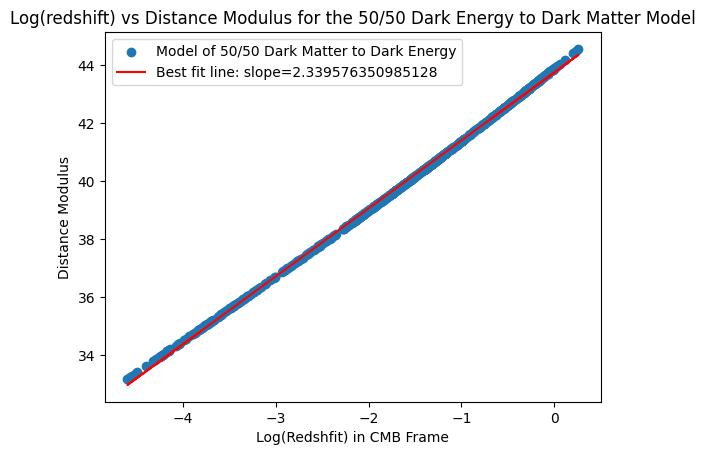

CHI ERROR OF 50/50 MODEL = 0.0172486653152856


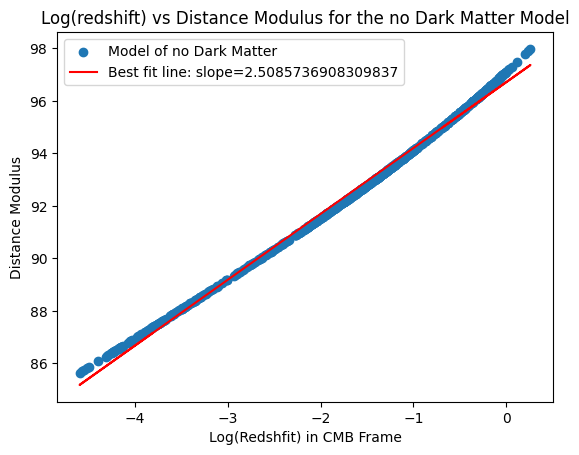

CHI ERROR OF NO DARK MATTER MODEL = 239.4004732220034


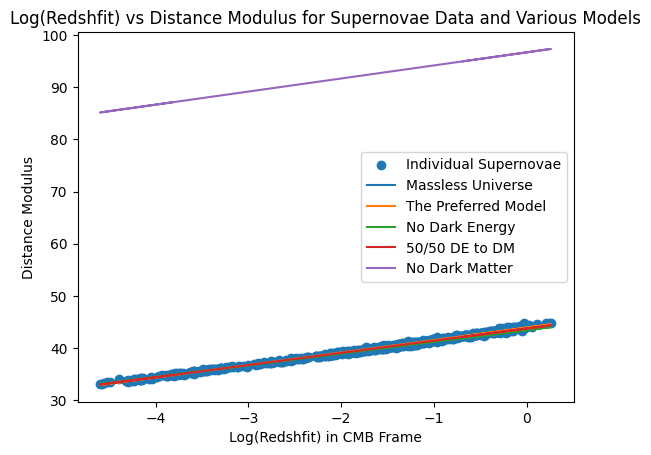

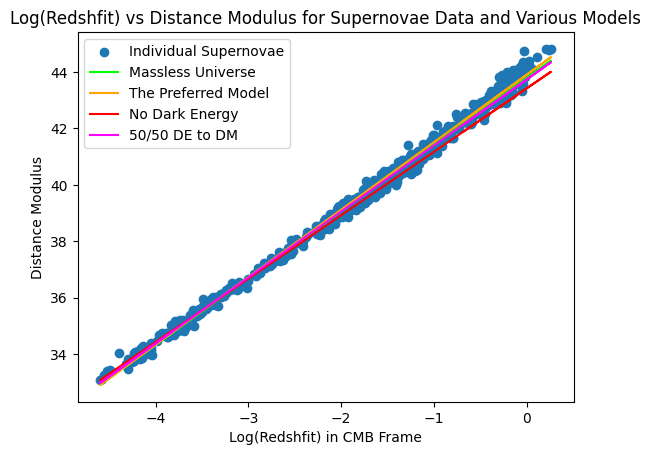

Model Name Chi Squared Error 
['Massless', 'Preferred', 'No DE', '50/50 DE to DM', 'No DM'] [0.015316503965978868, 0.01350959859475949, 0.050043573151916806, 0.0172486653152856, 239.4004732220034]


In [36]:
#Using different models now:
Hnought=70 #in km s^-1 Mpc^-1
def eqn5(zcmb):
  d = (((zcmb*(3e5))/Hnought) * (1 + (zcmb / 2) )) * 1e6 #where 3e5 is speed of light in km/s and we multiply by 1e6 to convert Mpc to pc
  return d

#obtaining distance modulus for massless universe from eqn 5 distacnes

def modulus(d):
  mu =  (5 * np.log10(d)) - 5
  return mu

#finding chi square error of this model
mod_err=0

for i in range(len(zcmb)):
  mod = modulus(eqn5(zcmb[i]))
  mod_err += np.abs(((mus[i] - mod)**2) / (mod**2))

plt.scatter(np.log(zcmb), modulus(eqn5(zcmb)), label ='The Massless Model')
plt.title('Log(redshift) vs Distance Modulus for the Massless Model')

plt.xlabel('Log(Redshfit) in CMB Frame')
plt.ylabel('Distance Modulus')

#best fit line for this
o, p = np.polyfit(np.log(zcmb), modulus(eqn5(zcmb)), 1)
line1=o*(np.log((zcmb))) + p
plt.plot(np.log(zcmb), line1, color='red', label='Best fit line: slope={}'.format(o))

print('Massless Model Error =',mod_err)
plt.legend()
plt.show()

#Importing FlatLambdaCDM
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
#Preferred model from text
preferred= FlatLambdaCDM(H0=70,Om0=0.3)
dist_preff = preferred.luminosity_distance(zcmb.values)

# Convert the distance to Mpc and extract the value
dist_preff_pc = dist_preff.to(u.pc)
d_preff_pcval = dist_preff_pc.value

#Calculate distance modulus of Preferred model of FlatLambdaCDM
preferred_modulus = 5 * np.log10(d_preff_pcval) - 5


plt.scatter(np.log(zcmb), preferred_modulus, label='The Preferred Model of 30% dark matter & 70% dark energy')
plt.title('Log(redshift) vs Distance Modulus for the Preferred Model')
plt.xlabel('Log(Redshfit) in CMB Frame')
plt.ylabel('Distance Modulus')

#fitting slope to this data
q, w = np.polyfit(np.log(zcmb), preferred_modulus, 1)
line2=q*(np.log((zcmb))) + w
plt.plot(np.log(zcmb), line2, color='red', label='Best fit line: slope={}'.format(q))
plt.legend()
plt.show()

#CHI error calculation
preff_err = np.sum(((mus - preferred_modulus)**2) / (preferred_modulus**2))
print('CHI ERROR OF PREFERRED MODEL =', preff_err)

#no dark energy model
noDE= FlatLambdaCDM(H0=70,Om0=1)
dist_noDE = noDE.luminosity_distance(zcmb.values)

# Convert the distance to Mpc and extract the value
dist_noDE_pc = dist_noDE.to(u.pc)
d_noDE_pcval = dist_noDE_pc.value

#Calculate distance modulus of Preferred model of FlatLambdaCDM
noDE_modulus = 5 * np.log10(d_noDE_pcval) - 5


plt.scatter(np.log(zcmb), noDE_modulus, label='Model of Dark Matter & no dark energy')
plt.title('Log(redshift) vs Distance Modulus for the No Dark Energy Model')
plt.xlabel('Log(Redshfit) in CMB Frame')
plt.ylabel('Distance Modulus')

#fitting slope to this data
z, s = np.polyfit(np.log(zcmb), noDE_modulus, 1)
line3=z*(np.log((zcmb))) + s
plt.plot(np.log(zcmb), line3, color='red', label='Best fit line: slope={}'.format(z))
plt.legend()
plt.show()
#CHI error calculation
noDE_err = np.sum(((mus - noDE_modulus)**2) / (noDE_modulus**2))
print('CHI ERROR OF NO DARK ENERGY MODEL =', noDE_err)

#My 50/50 dark energy to dark matter model
fiftyfifty= FlatLambdaCDM(H0=70,Om0=0.5)
dist_fifty = fiftyfifty.luminosity_distance(zcmb.values)

# Convert the distance to Mpc and extract the value
dist_fifty_pc = dist_fifty.to(u.pc)
d_fifty_pcval = dist_fifty_pc.value

#Calculate distance modulus of 50/50 model of FlatLambdaCDM
fifty_modulus = 5 * np.log10(d_fifty_pcval) - 5



plt.scatter(np.log(zcmb), fifty_modulus, label='Model of 50/50 Dark Matter to Dark Energy')
plt.title('Log(redshift) vs Distance Modulus for the 50/50 Dark Energy to Dark Matter Model')
plt.xlabel('Log(Redshfit) in CMB Frame')
plt.ylabel('Distance Modulus')

#fitting slope to this data
r, u = np.polyfit(np.log(zcmb), fifty_modulus, 1)
line4=r*(np.log((zcmb))) + u
plt.plot(np.log(zcmb), line4, color='red', label='Best fit line: slope={}'.format(r))
plt.legend()
plt.show()

#CHI error calculation
fifty_err = np.sum(((mus - fifty_modulus)**2) / (fifty_modulus**2))
print('CHI ERROR OF 50/50 MODEL =', fifty_err)

#My no dark matter model
nodM= FlatLambdaCDM(H0=70,Om0=0)
dist_noDM = nodM.luminosity_distance(zcmb.values)

# Convert the distance to Mpc and extract the value
dist_noDM_pc = dist_noDM * 3.08567758149137e+16
d_noDM_pcval = dist_noDM_pc.value

#Calculate distance modulus of Preferred model of FlatLambdaCDM
noDM_modulus = 5 * np.log10(d_noDM_pcval) - 5


plt.scatter(np.log(zcmb), noDM_modulus, label='Model of no Dark Matter')
plt.title('Log(redshift) vs Distance Modulus for the no Dark Matter Model')
plt.xlabel('Log(Redshfit) in CMB Frame')
plt.ylabel('Distance Modulus')

#fitting slope to this data
h, g = np.polyfit(np.log(zcmb), noDM_modulus, 1)
line5=h*(np.log((zcmb))) + g
plt.plot(np.log(zcmb), line5, color='red', label='Best fit line: slope={}'.format(h))
plt.legend()
plt.show()

#CHI error calculation
noDM_err = np.sum(((mus - noDM_modulus)**2) / (noDM_modulus**2))
print('CHI ERROR OF NO DARK MATTER MODEL =', noDM_err)



#plotting models against data
plt.scatter(np.log(zcmb), mus, label='Individual Supernovae')
plt.title('Log(Redshfit) vs Distance Modulus for Supernovae Data and Various Models')
plt.plot(np.log(zcmb), line1, label='Massless Universe' )
plt.plot(np.log(zcmb), line2, label='The Preferred Model')
plt.plot(np.log(zcmb), line3, label='No Dark Energy')
plt.plot(np.log(zcmb), line4, label='50/50 DE to DM')
plt.plot(np.log(zcmb), line5, label='No Dark Matter')
plt.legend()
plt.xlabel('Log(Redshfit) in CMB Frame')
plt.ylabel('Distance Modulus')
plt.show()

#and again as no dark matter model is terrible!
plt.scatter(np.log(zcmb), mus, label='Individual Supernovae')
plt.title('Log(Redshfit) vs Distance Modulus for Supernovae Data and Various Models')
plt.plot(np.log(zcmb), line1, label='Massless Universe', color='lime' )
plt.plot(np.log(zcmb), line2, label='The Preferred Model', color='orange')
plt.plot(np.log(zcmb), line3, label='No Dark Energy', color='red')
plt.plot(np.log(zcmb), line4, label='50/50 DE to DM',color='magenta')
#plt.plot(np.log(zcmb), line5, label='No Dark Matter')
plt.xlabel('Log(Redshfit) in CMB Frame')
plt.ylabel('Distance Modulus')
plt.legend()
plt.show()
namelist=['Massless', 'Preferred', 'No DE', '50/50 DE to DM', 'No DM']
Chilist=[mod_err, preff_err, noDE_err, fifty_err, noDM_err]
print(color.BOLD+'Model Name','Chi Squared Error', color.END)
print(namelist, Chilist)